## Example 2 with large data set

In this example, we will use real data imported from csv file instead of made-up ones

In [3]:
# import everything we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
# We are going to use the built-in data sets from sklearn
# This dataset contains boston housing infomation

# import datasets from sklearn first
from sklearn import datasets
boston = datasets.load_boston() # get built-in dataset, data has all the features, target is what we want to predict
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above
df = pd.DataFrame(boston.data, 
                  columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['MEDV'] = boston.target # add 'target' as the last column in the dataframe
df.head() # show the first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


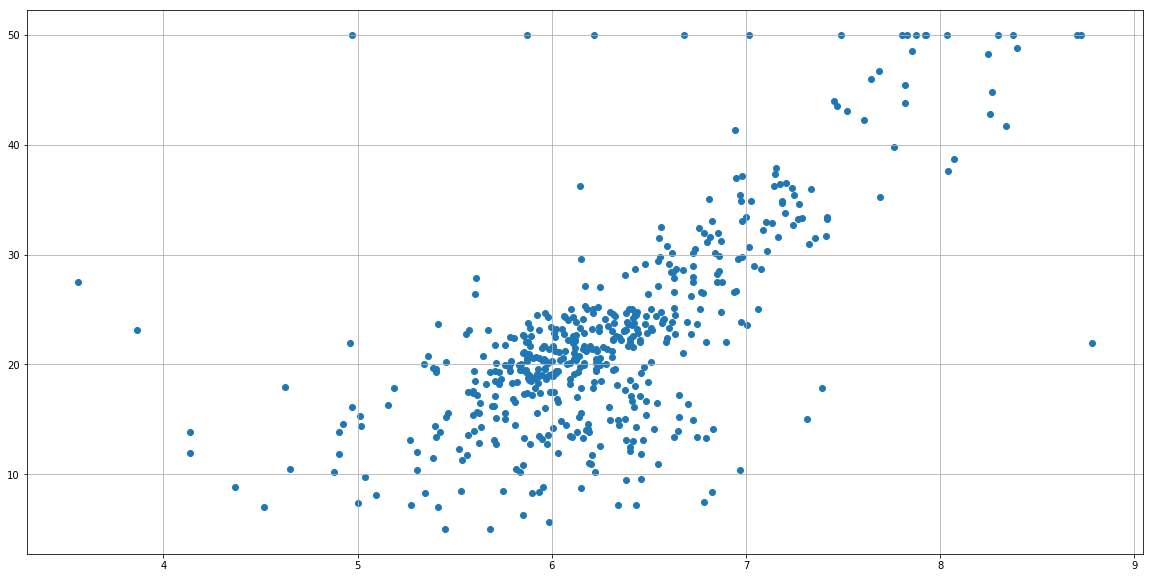

In [59]:
# We can see that feature 'RM', average number of rooms per dwelling,
# has a linear relationship with our target 'MEDV', Median value of owner-occupied homes in $1000's

fig, ax = plt.subplots(figsize=(20,10)) 
ax.scatter(df['RM'], df['MEDV']) # plot the data
ax.grid()
plt.show()

## Model Training

### Train/Test split

To train a model, it is good practice to split your data into two sets:

    training set
    test set

This allows the model to avoid "overfitting", which is when the model is "too specific" to the data we give it.

    The danger of overfitting is that the model can only work well with the data we've used to train it.
    To avoid this, we usually "hold back" some of the data for "independent testing". This becomes the test set.

The above is the layman's explanation. We'll cover overfitting in more formal detail in the next module.
Use Linear Regression model from Scikit Learn.

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [7]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = df[['RM']] 

y = df['MEDV']

# Default testing set is 25%, here we change it to 20% (test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
X_train.head()

,RM
477,5.304
15,5.834
332,6.031
423,6.103
19,5.727


In [8]:
# We need 2D arrays for x_train and x_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


## Prediction¶

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [9]:
# instantiate a linear regression model
lModel = linear_model.LinearRegression()

# train the model to fit the training data, finding the coef and intercept
model = lModel.fit(X_train, y_train)
y_hat = lModel.predict(X_test)
print(y_hat)

[23.73238293 26.92950201 19.68456842 20.45112913 22.61993506 22.45166563
 19.03953562 21.47009399 21.98425056 20.09589368 19.38542277 19.88088275
  5.99865516 22.01229547 17.11378553 29.00482492 18.71234507  9.37339197
 37.37155468 21.5729253  22.08708188 24.34937082 17.16052704 25.38703227
 19.89957935 14.48691283 18.66560356 26.64905296 19.46955748 17.91773945
 15.84241654 23.82586594 32.11780929 13.87927324 19.87153445 17.12313383
 30.92122671 18.61886206 20.44178083 22.13382339 14.14102568 27.78019743
 38.8579346  16.04807917 23.74173123 17.16052704 17.04834742 23.74173123
 21.40465588 25.21876285 19.92762425 28.8926453  21.17094834 27.14451294
 33.58549261 22.76015958 21.89076755 27.89237705 23.47997879 16.15091049
 26.96689521 31.519518   25.00375192 14.75801358 25.25615606 13.71100382
 24.2465395  22.66667657 25.40572888 19.61913031 17.84295304 26.8547156
 18.47863754 19.24519825 21.15225174 14.72996867 21.40465588 37.16589205
 24.93831381 14.36538492 18.76843488 16.2630901  18.

In [10]:
# We can also do prediction based on single value
print(lModel.predict([[4.67]]))

[7.41024867]


In [11]:
# we can see the coefficient and intercept our model finds
print(lModel.coef_) # the 'slope'
print(lModel.intercept_) # the intercept

[9.34830141]
-36.24631889813795


## Model Validation

We want to see how well our model fits the data. We will use MSE and r2-score to check

A smaller mean-squared error is better, r2-score should be as close to 1 as possible

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_hat)

46.144775347317264

In [13]:
r2_score(y_test, y_hat)

0.3707569232254778

As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

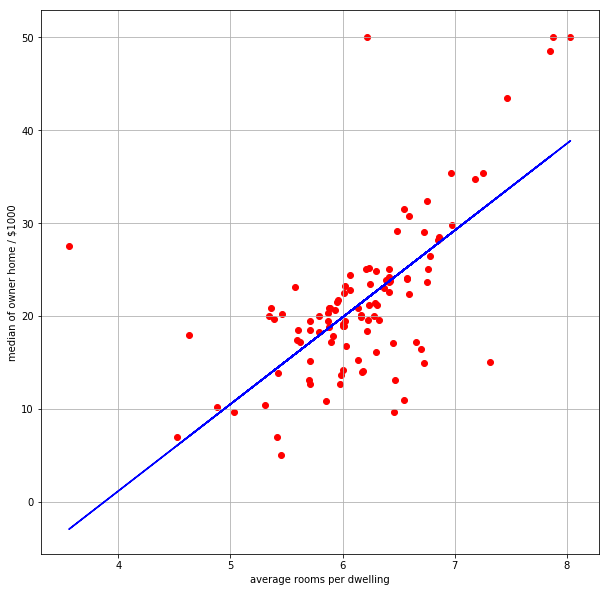

In [14]:
# We want to plot the regression line(blue) vs the actual value(red)
fig, ax = plt.subplots(figsize = (10,10))


ax.plot(X_test, y_hat, c = 'blue', label='Test data')
ax.scatter(X_test, y_test, c = 'red', label='Test points')
ax.set(xlabel='average rooms per dwelling', ylabel='median of owner home / $1000')
ax.grid()
plt.show()

We can see that there are many scattered data points than affect how our model would be like